# Causal  Inference란?

<font size=30> Introduction </font>
<br>아래 그림을 확인해 보자
<br>
<br><img src="plant.png" width=100 height=100/>

<font face=" "> I am in bold </font>
 <font face="Microsoft Yahei"> I am Microsoft Yahei </font>
 <font face="STCAIYUN">I am Chinese Caiyun</font>
 <font color=#0099ff size=7 face="black body"> color=#0099ff size=72 face="black body" </font>
<font color=#00ffff size=72> color=#00ffff </font>
<font color=gray size=72> color=gray </font> 


In [8]:
from IPython.display import Image
import os 

In [4]:
os.getcwd()

'c:\\Users\\mip\\Desktop\\Python\\causal_inference'

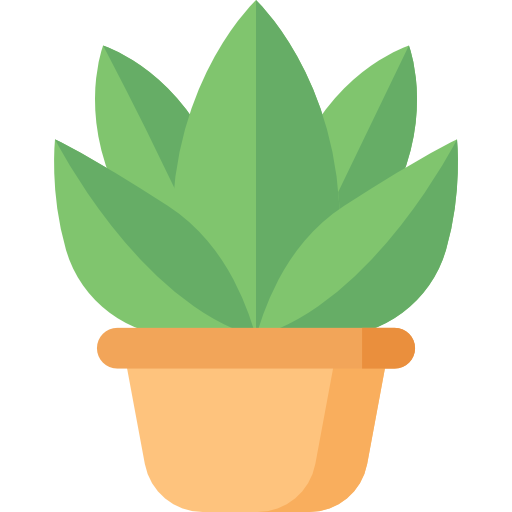

In [7]:
Image("C:/Users/mip/Desktop/Python/causal_inference/plant.png")

In [9]:
from IPython.core.display import display, HTML

display(HTML('<h1>Hello, world!</h1>'))

In [16]:
display(HTML('<font color=white size=7 face="black body"> Introduction </font>'))